# Gold Price Forecasting

In this notebook we shall use a simple ARIMA model to predict and forecast the price of the comodity Gold.

## 1. Introduction to Time-Series Analysis
* A time-series data is a series of data points or observations recorded at different or regular time intervals. In general, a time series is a sequence of data points taken at equally spaced time intervals. The frequency of recorded data points may be hourly, daily, weekly, monthly, quarterly or annually.
* Time-Series Forecasting is the process of using a statistical model to predict future values of a time-series based on past results.
* A time series analysis encompasses statistical methods for analyzing time series data. These methods enable us to extract meaningful statistics, patterns and other characteristics of the data. Time series are visualized with the help of line charts. So, time series analysis involves understanding inherent aspects of the time series data so that we can create meaningful and accurate forecasts.
* Applications of time series are used in statistics, finance or business applications. .

In [1]:
!pip install jovian --upgrade --quiet

     |████████████████████████████████| 68 kB 3.1 MB/s 


In [4]:
!pip install opendatasets --quiet

In [3]:
import jovian

In [ ]:
# Execute this to save new versions of the notebook
jovian.commit(project="gold-final-arima")

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/kartikaye-madhok/gold-final-arima


'https://jovian.ai/kartikaye-madhok/gold-final-arima'

### Components of a Time-Series

**Trend** - The trend shows a general direction of the time series data over a long period of time. A trend can be increasing(upward), decreasing(downward), or horizontal(stationary).

**Seasonality** - The seasonality component exhibits a trend that repeats with respect to timing, direction, and magnitude. Some examples include an increase in water consumption in summer due to hot weather conditions.

**Cyclical Component** - These are the trends with no set repetition over a particular period of time. A cycle refers to the period of ups and downs, booms and slums of a time series, mostly observed in business cycles. These cycles do not exhibit a seasonal variation but generally occur over a time period of 3 to 12 years depending on the nature of the time series.

**Irregular Variation** - These are the fluctuations in the time series data which become evident when trend and cyclical variations are removed. These variations are unpredictable, erratic, and may or may not be random.

**ETS Decomposition** - ETS Decomposition is used to separate different components of a time series. The term ETS stands for Error, Trend and Seasonality.


# 2. Time Series Terminology
There are various terms and concepts in time series that we should know. These are as follows:-

1. **Dependence** - It refers to the association of two observations of the same variable at prior time periods.

2. **Stationarity** - It shows the mean value of the series that remains constant over the time period. If past effects accumulate and the values increase towards infinity then stationarity is not met.

3. **Differencing** - Differencing is used to make the series stationary and to control the auto-correlations. There may be some cases in time series analyses where we do not require differencing and over-differenced series can produce wrong estimates.

4. **Specification** - It may involve the testing of the linear or non-linear relationships of dependent variables by using time series models such as ARIMA models.

5. **Exponential Smoothing** - Exponential smoothing in time series analysis predicts the one next period value based on the past and current value. It involves averaging of data such that the non-systematic components of each individual case or observation cancel out each other. The exponential smoothing method is used to predict the short term prediction.

6. **Curve fitting** - Curve fitting regression in time series analysis is used when data is in a non-linear relationship.

7. **ARIMA** - ARIMA stands for Auto Regressive Integrated Moving Average.

# 3. Time Series Analysis

## 3.1 Importing Libraries

In [6]:
#Data Importing
import opendatasets as od
import os
import datetime

# Data wrangling
import pandas as pd
import numpy as np

# Data visualisation
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib as plt
import matplotlib.pyplot as plt
from pylab import rcParams

#Statistics 
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from dateutil.parser import parse
from sklearn.model_selection import train_test_split
from statsmodels.tsa.stattools import acf


# Remove warnings
import warnings
warnings.filterwarnings('ignore')

## 3.2 Importing and Reading Data

In [7]:
dataset_url='https://www.kaggle.com/datasets/arashnic/learn-time-series-forecasting-from-gold-price?datasetId=984101&sortBy=voteCount'

In [8]:
od.download(dataset_url)

100%|██████████| 48.6k/48.6k [00:00<00:00, 12.9MB/s]

In [9]:
data_dir = './learn-time-series-forecasting-from-gold-price'

In [10]:
os.listdir(data_dir)

['gold_price_data.csv']

In [11]:
gold_df = pd.read_csv('./learn-time-series-forecasting-from-gold-price/gold_price_data.csv')

In [12]:
gold_df.head()

,Date,Value
0,1970-01-01,35.2
1,1970-04-01,35.1
2,1970-07-01,35.4
3,1970-10-01,36.2
4,1971-01-01,37.4


# 4. Understanding the Data

In [13]:
gold_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10787 entries, 0 to 10786
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    10787 non-null  object 
 1   Value   10787 non-null  float64
dtypes: float64(1), object(1)
memory usage: 168.7+ KB


As we can the Date in gold_df is of the type object. It shall be prudent for us to convert it into the Date-time type and also to make the Date column as our Index.

In [14]:
gold_df.reset_index()

,index,Date,Value
0,0,1970-01-01,35.20
1,1,1970-04-01,35.10
2,2,1970-07-01,35.40
3,3,1970-10-01,36.20
4,4,1971-01-01,37.40
...,...,...,...
10782,10782,2020-03-09,1672.50
10783,10783,2020-03-10,1655.70
10784,10784,2020-03-11,1653.75
10785,10785,2020-03-12,1570.70


In [15]:
gold_df['Date'] = pd.to_datetime(gold_df['Date'], errors='coerce')

In [16]:
gold_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10787 entries, 0 to 10786
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    10787 non-null  datetime64[ns]
 1   Value   10787 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 168.7 KB


In [17]:
gold_df=gold_df.set_index('Date',drop=True)

In [18]:
gold_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Value,10787.0,653.596634,434.030848,35.1,349.2,409.35,1061.625,1895.0


# 5. Visualizations

## 5.1 Time Resampling

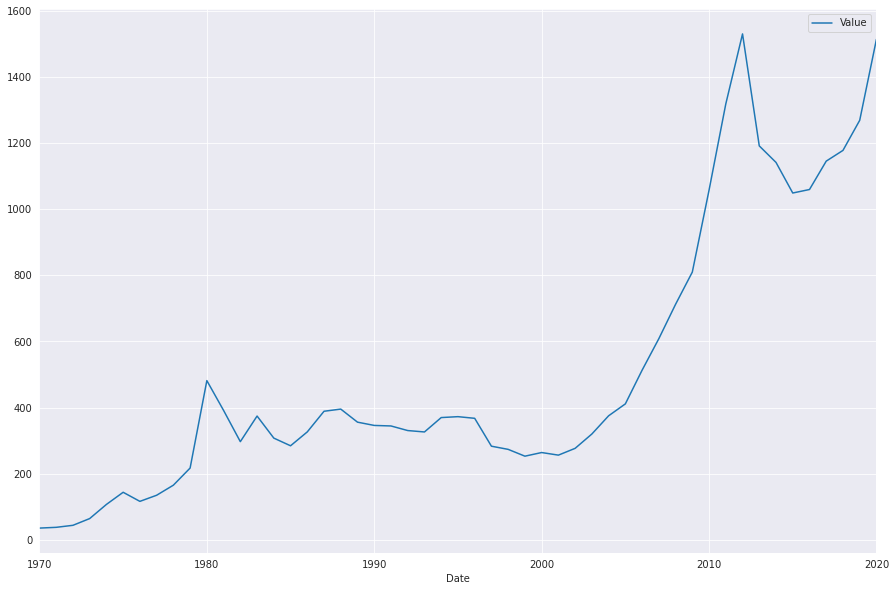

In [19]:
# Least value throughout the calender year

gold_df.resample(rule='A').min().plot(figsize=(15,10))

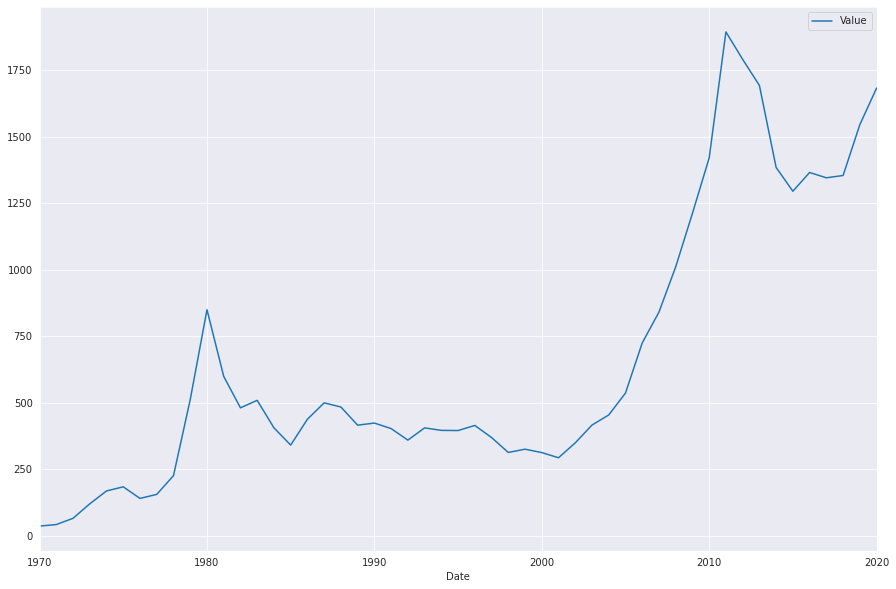

In [20]:
# Plot of maximum value per year

gold_df.resample(rule='A').max().plot(figsize=(15,10))

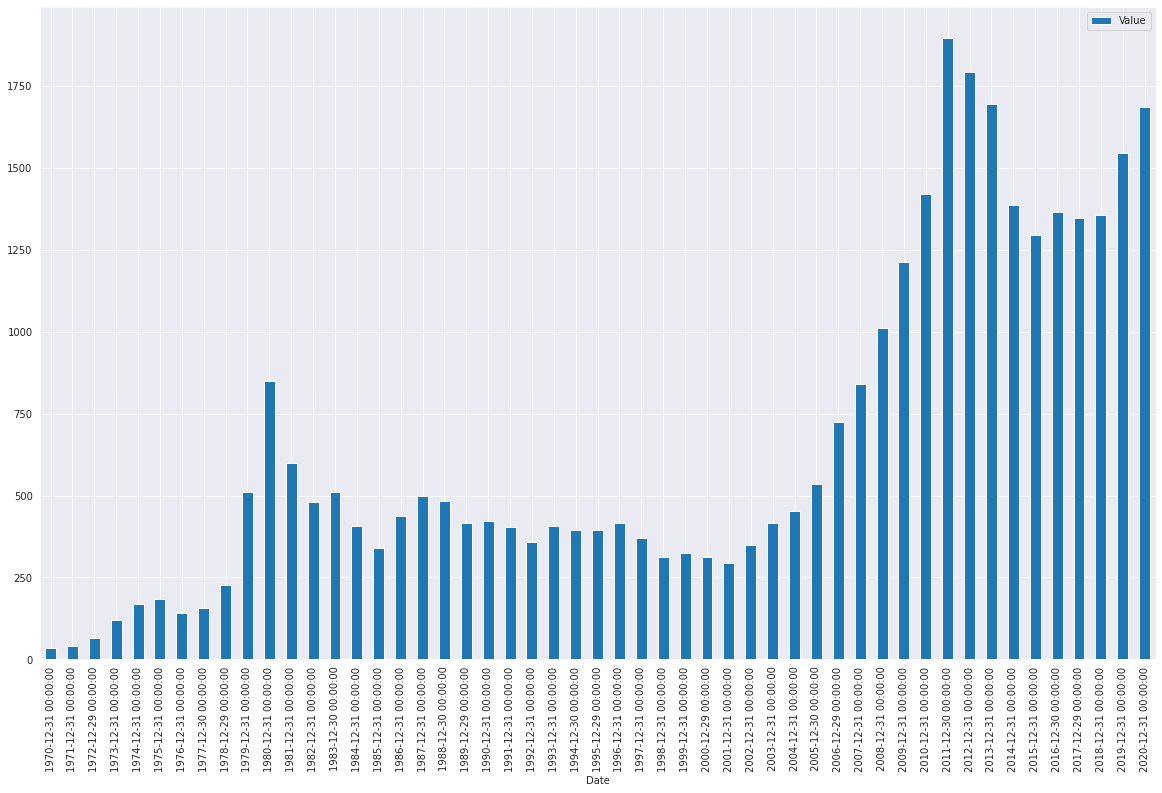

In [21]:
# Highest Price each year in Bar Graph

gold_df.resample(rule='BA').max().plot(figsize=(20,12),kind='bar')

## 5.2 Visualisations

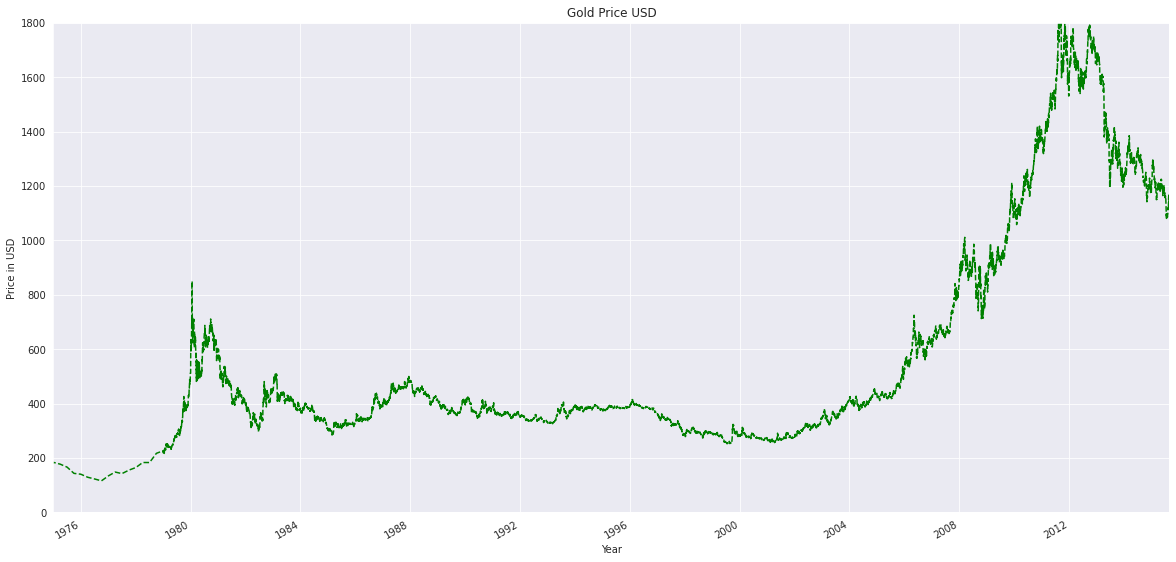

In [22]:
# xlimit and y limit between Jan 1st 1975 and September 1st, 2015.
## Apply colouring[c] and line style (ls)

gold_df['Value'].plot(xlim=['1975-01-01','2015-09-01'],
                      ylim=[0,1800],
                      c='green',
                      ls='--',
                      figsize=(20,10), 
                      ylabel = "Price in USD", 
                      xlabel="Year",  
                      title="Gold Price USD")

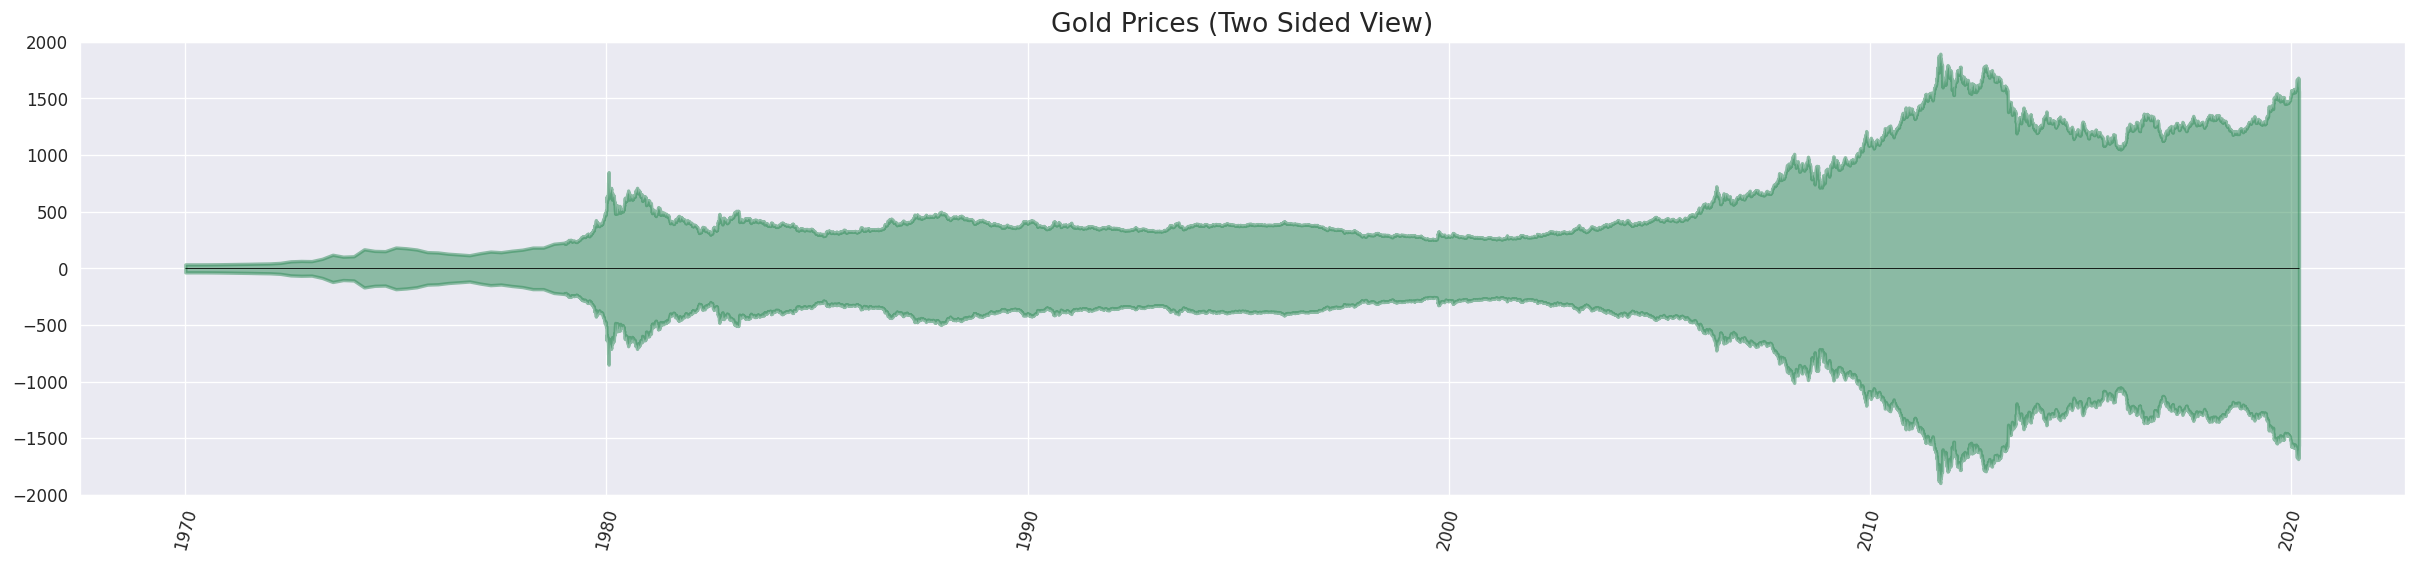

In [23]:
x=gold_df.index.values
y1=gold_df['Value'].values

#plot
fig, ax = plt.subplots(1,1, figsize=(25,5), dpi=120)
plt.fill_between(x, y1=y1, y2=-y1, alpha=0.5, linewidth=2, color='seagreen')
plt.ylim(-2000,2000)
plt.title('Gold Prices (Two Sided View)', fontsize=16)
plt.hlines(y=0, xmin=np.min(gold_df.index), xmax=np.max(gold_df.index), linewidth=0.5)
plt.xticks(rotation = 75)
plt.show()

# 6. Patterns in a Time Series

* Any time series visualization may consist of the following components: Base Level + Trend + Seasonality + Error.

##### Trend

* A trend is observed when there is an increasing or decreasing slope observed in the time series.


##### Seasonality

* A seasonality is observed when there is a distinct repeated pattern observed between regular intervals due to seasonal factors. It could be because of the month of the year, the day of the month, weekdays or even time of the day.


However, It is not mandatory that all time series must have a trend and/or seasonality. A time series may not have a distinct trend but have a seasonality and vice-versa.

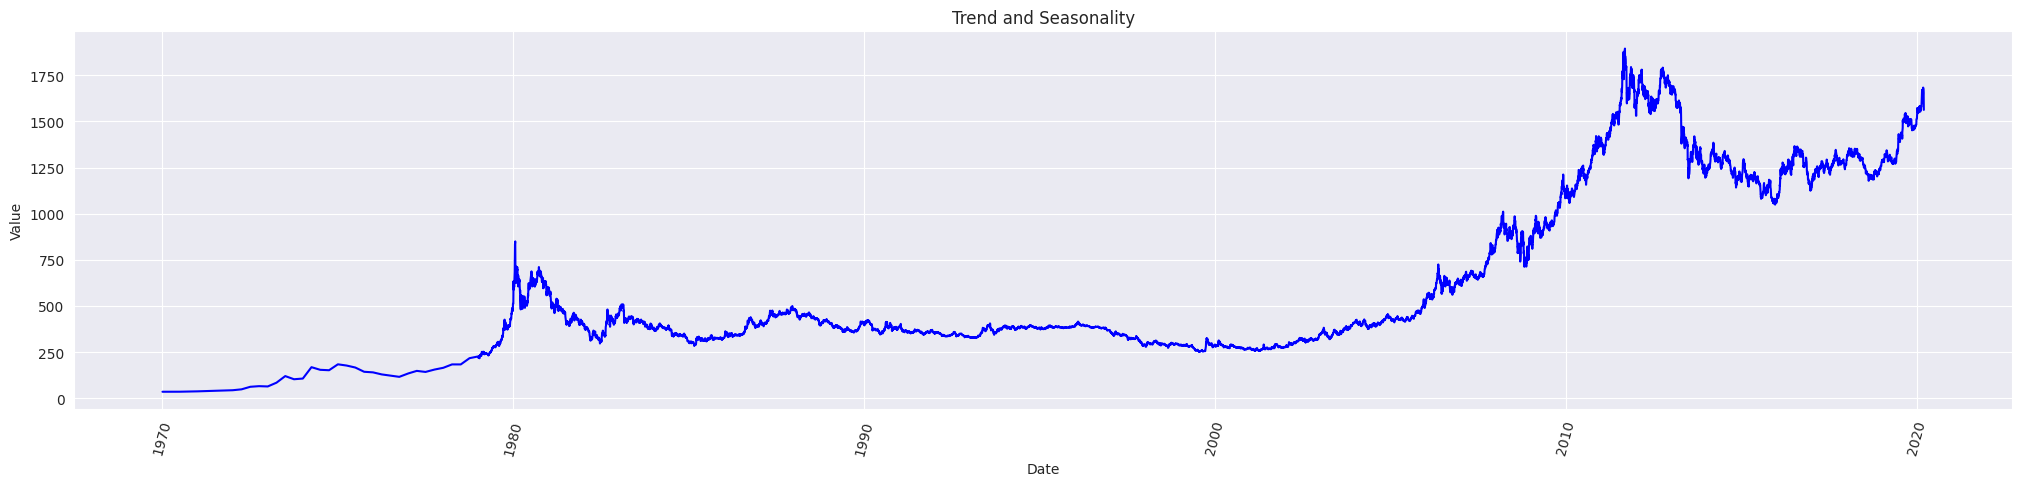

In [ ]:
def plot_df(gold_df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(25,5), dpi=dpi)
    plt.plot(x, y, color='blue')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.xticks(rotation = 75)
    plt.show()
    

plot_df(gold_df, x=gold_df.index, y=gold_df['Value'], title='Trend and Seasonality')

# 7. Decomposition of Time Series

In [ ]:
#?seasonal_decompose

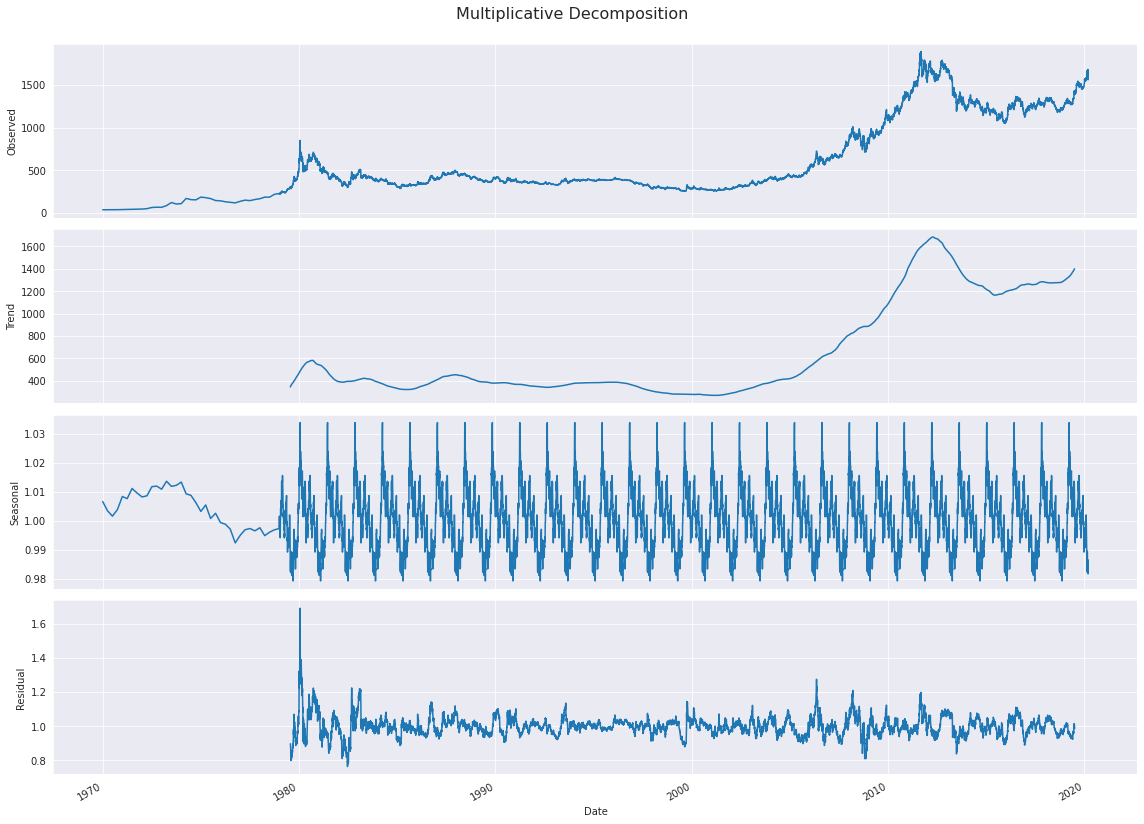

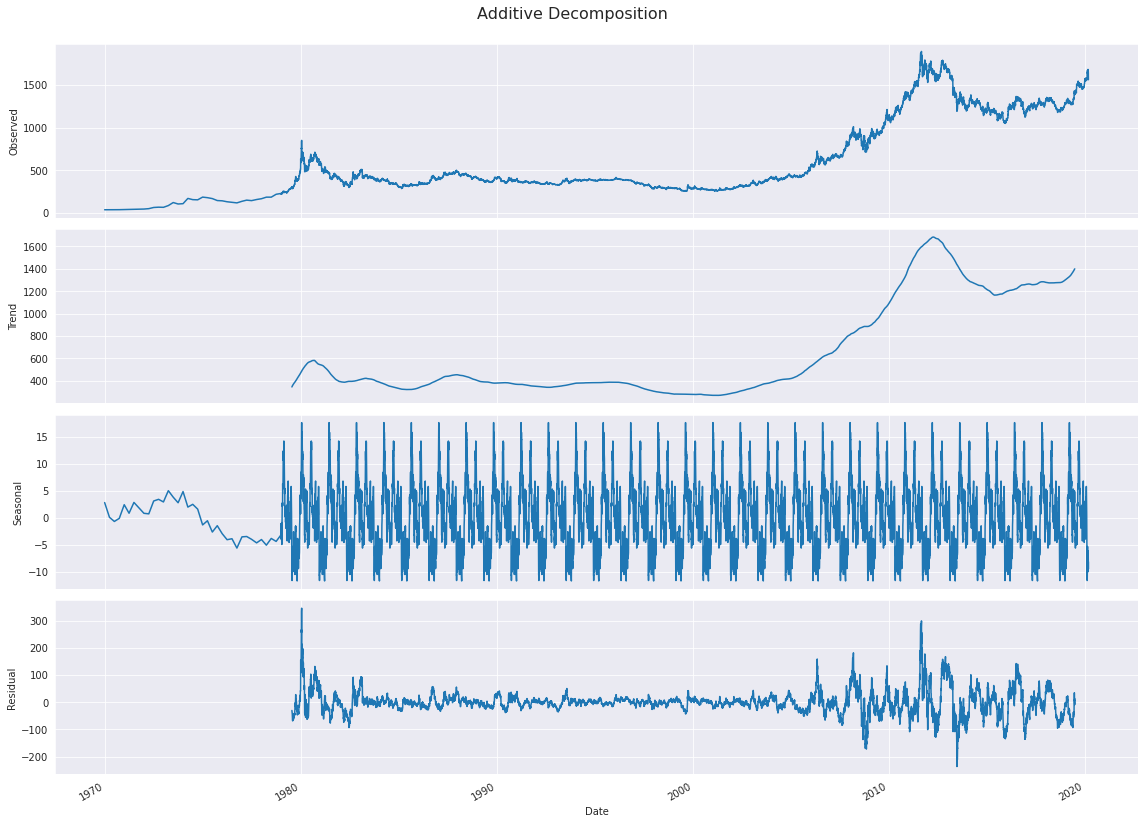

In [25]:
# Multiplicative Decomposition 
multiplicative_decomposition = seasonal_decompose(gold_df['Value'], model='multiplicative', freq=365)

# Additive Decomposition
additive_decomposition = seasonal_decompose(gold_df['Value'], model='additive', freq=365)

# Plot
plt.rcParams.update({'figure.figsize': (16,12)})
multiplicative_decomposition.plot().suptitle('Multiplicative Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

additive_decomposition.plot().suptitle('Additive Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

# 8. Stationarity of Time Series

## 8.1 Making Time Series Stationary

* We can apply some sort of transformation to make the time-series stationary. These transformation may include:
1. Differencing the Series (once or more)
2. Take the log of the series
3. Take the nth root of the series
4. Combination of the above

* The most commonly used and convenient method to stationarize the series is by differencing the series at least once until it becomes approximately stationary

## 8.2 How to test for Stationarity

* The stationarity of a series can be checked by looking at the plot of the series.
* Another way is to split the series into 2 or more contiguous parts and computing the summary statistics like mean, variance and the auto corelation. If the stats are quite different then the series is not likely to be stationary.
* **Quantitative Meathods** Using statistical tests called [Unit Root Tests](https://en.wikipedia.org/wiki/Unit_root). This checks if the time series is non-stationary and possess a unit root.
* Some implimentations of the Unit Root Test are:
1. Augmented Dickey Fuller Test (ADF Test)
2. Kwiatkowski-Phillips-Schmidt_shin - KPSS test [Trend Stationary]
3. Philips Perron Test (PP Test)

## 8.3 Augmented Dickey Fuller Test

* **Augmented Dickey Fuller test or (ADF Test)** is the most commonly used test to detect stationarity. Here, we assume that the null hypothesis is the time series possesses a unit root and is non-stationary. Then, we collect evidence to support or reject the null hypothesis. So, if we find that the p-value in ADF test is less than the significance level (0.05), we reject the null hypothesis.

In [26]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(gold_df.Value.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -0.071121
p-value: 0.952240


* Since p-value(1.00) is greater than the significance level(0.05), let’s difference the series and see how the autocorrelation plot looks like.

In [ ]:
?plot_acf

In [28]:
gold_df.Value

Date
1970-01-01      35.20
1970-04-01      35.10
1970-07-01      35.40
1970-10-01      36.20
1971-01-01      37.40
               ...   
2020-03-09    1672.50
2020-03-10    1655.70
2020-03-11    1653.75
2020-03-12    1570.70
2020-03-13    1562.80
Name: Value, Length: 10787, dtype: float64

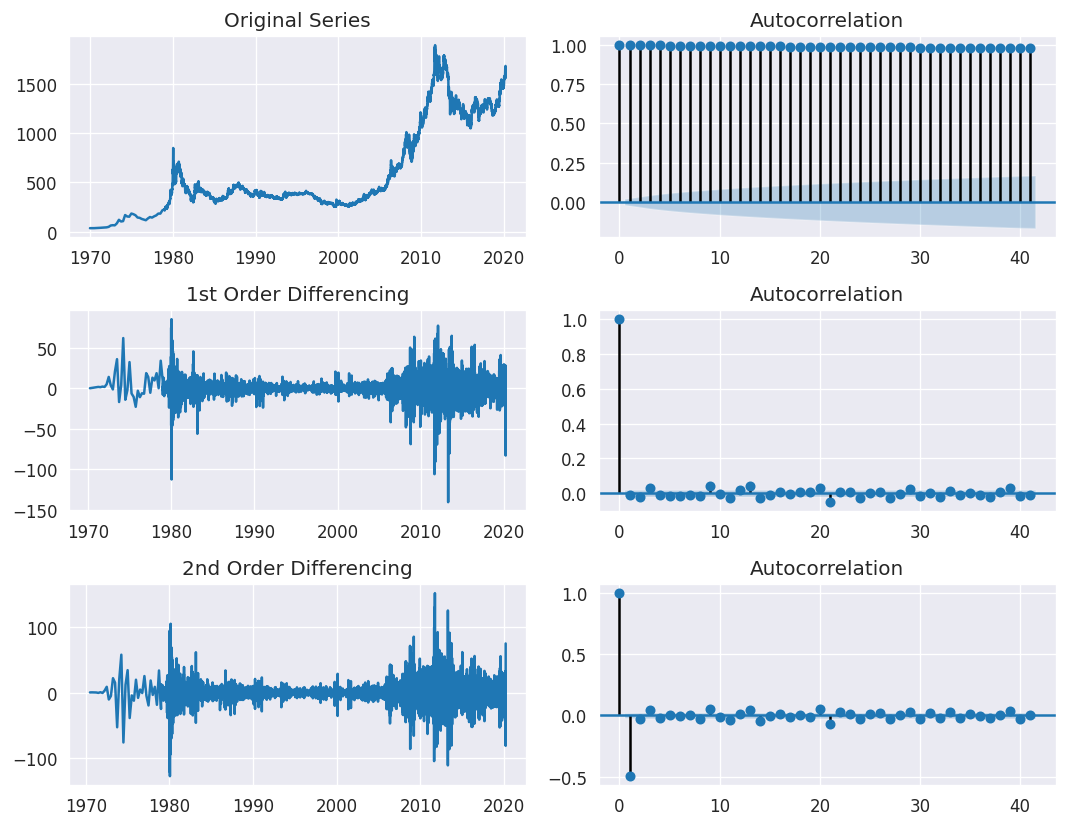

In [29]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

# original series

fig,axes = plt.subplots(3,2,)
axes[0,0].plot(gold_df.Value); 
axes[0,0].set_title('Original Series')
plot_acf(gold_df.Value, ax=axes[0,1])

# 1st Differencing
axes[1, 0].plot(gold_df.Value.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(gold_df.Value.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(gold_df.Value.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(gold_df.Value.diff().diff().dropna(), ax=axes[2, 1])

plt.tight_layout()
plt.show()

For the above data, we can see that the time series reaches stationarity with **ONE** orders of differencing.

##8.4 Detrend a Time Series

Detrending a time series means to remove the trend component from the time series. There are multiple approaches of doing this as listed below:

1. Subtract the line of best fit from the time series. The line of best fit may be obtained from a linear regression model with the time steps as the predictor. For more complex trends, we may want to use quadratic terms (x^2) in the model.

2. We subtract the trend component obtained from time series decomposition.

Subtract the mean.

Apply a filter like Baxter-King filter(statsmodels.tsa.filters.bkfilter) or the Hodrick-Prescott Filter (statsmodels.tsa.filters.hpfilter) to remove the moving average trend lines or the cyclical components.

Now, we will implement the first two methods to detrend a time series.

Text(0.5, 1.0, 'Gold prices detrended by subtracting the least squares fit')

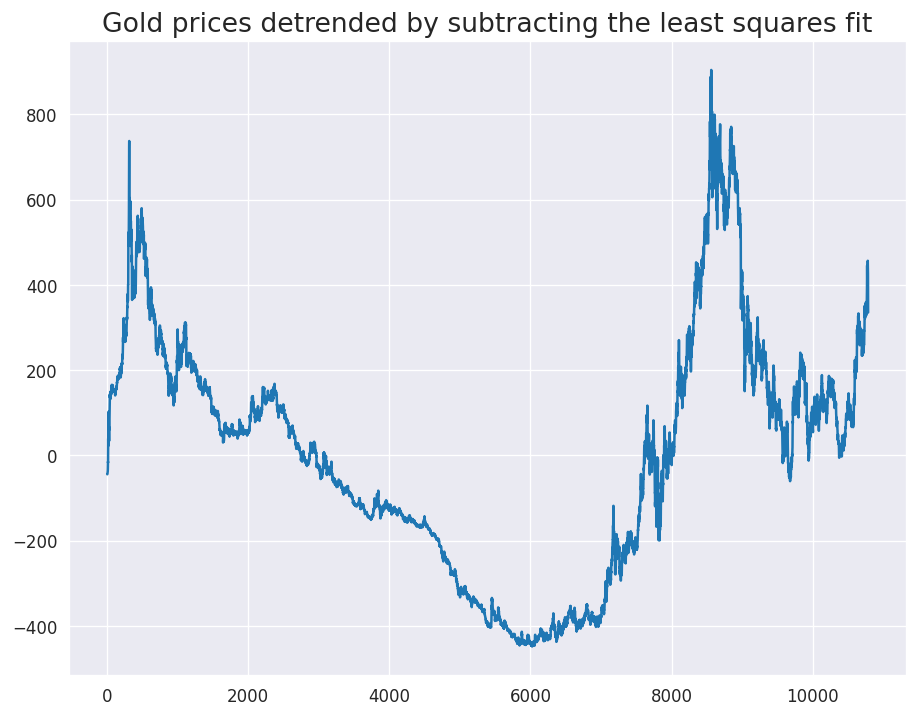

In [30]:
# Using scipy: Subtract the line of best fit
from scipy import signal
detrended = signal.detrend(gold_df['Value'].values)
plt.plot(detrended)
plt.title('Gold prices detrended by subtracting the least squares fit', fontsize=16)

Text(0.5, 1.0, 'Gold Prices detrended by subtracting the trend component')

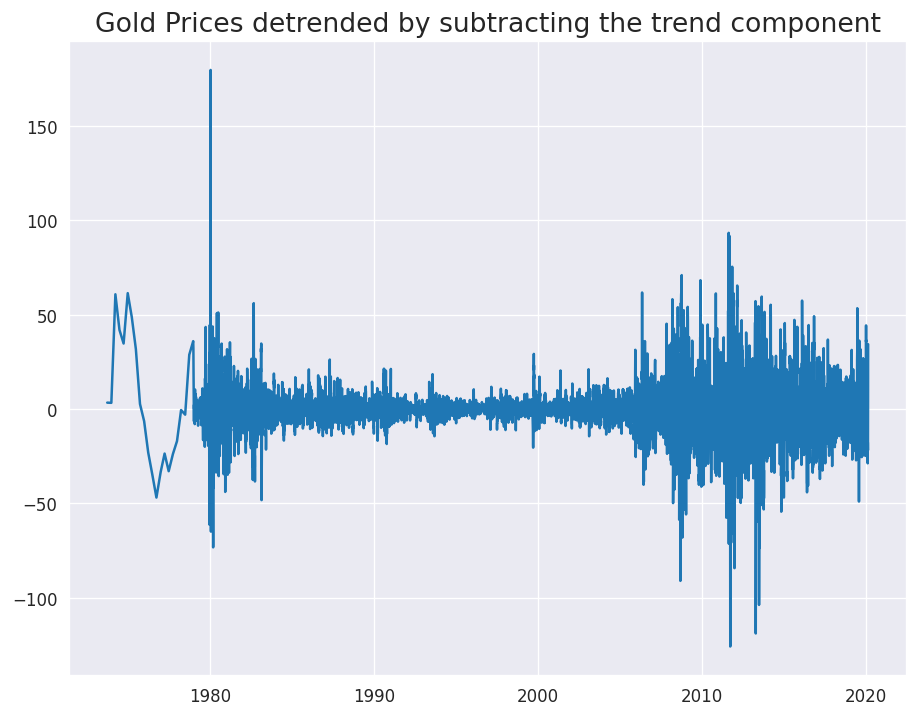

In [32]:
# Using statmodels: Subtracting the Trend Component
from statsmodels.tsa.seasonal import seasonal_decompose
result_mul = seasonal_decompose(gold_df['Value'], model='multiplicative', freq=30)
detrended = gold_df['Value'].values - result_mul.trend
plt.plot(detrended)
plt.title('Gold Prices detrended by subtracting the trend component', fontsize=16)

## 8.5 Deseasonalize a Time Series 

* There are multiple approaches to deseasonalize a time series. These approaches are listed below:

1. Take a moving average with length as the seasonal window. This will smoothen in series in the process.
2. Seasonal difference the series (subtract the value of previous season from the current value).
3. Divide the series by the seasonal index obtained from STL decomposition.
4. If dividing by the seasonal index does not work well, we will take a log of the series and then do the deseasonalizing. We will later restore to the original scale by taking an exponential.

[]

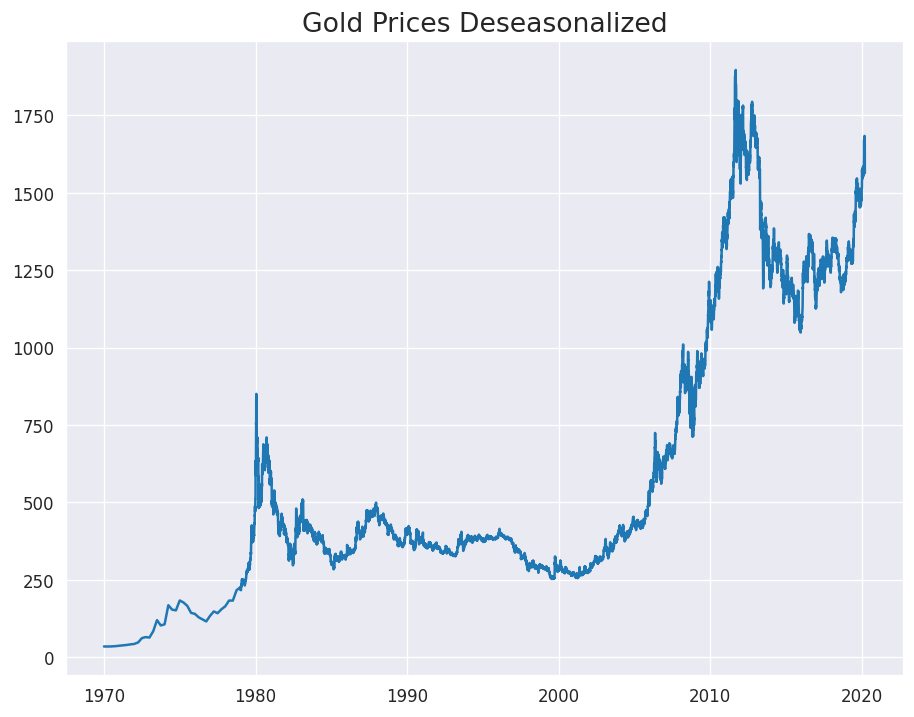

In [34]:
# Subtracting the Trend Component


# Time Series Decomposition
result_mul = seasonal_decompose(gold_df['Value'], model='multiplicative', freq=30)


# Deseasonalize
deseasonalized = gold_df['Value'].values / result_mul.seasonal


# Plot
plt.plot(deseasonalized)
plt.title('Gold Prices Deseasonalized', fontsize=16)
plt.plot()

## 8.6 How to check for Seasonality

The common way to test for seasonality of a time series is to plot the series and check for repeatable patterns in fixed time intervals. So, the types of seasonality is determined by the clock or the calendar.

* Hour of day
* Day of month
* Weekly
* Monthly
* Yearly

However, if we want a more definitive inspection of the seasonality, use the Autocorrelation Function (ACF) plot. There is a strong seasonal pattern, the ACF plot usually reveals definitive repeated spikes at the multiples of the seasonal window.

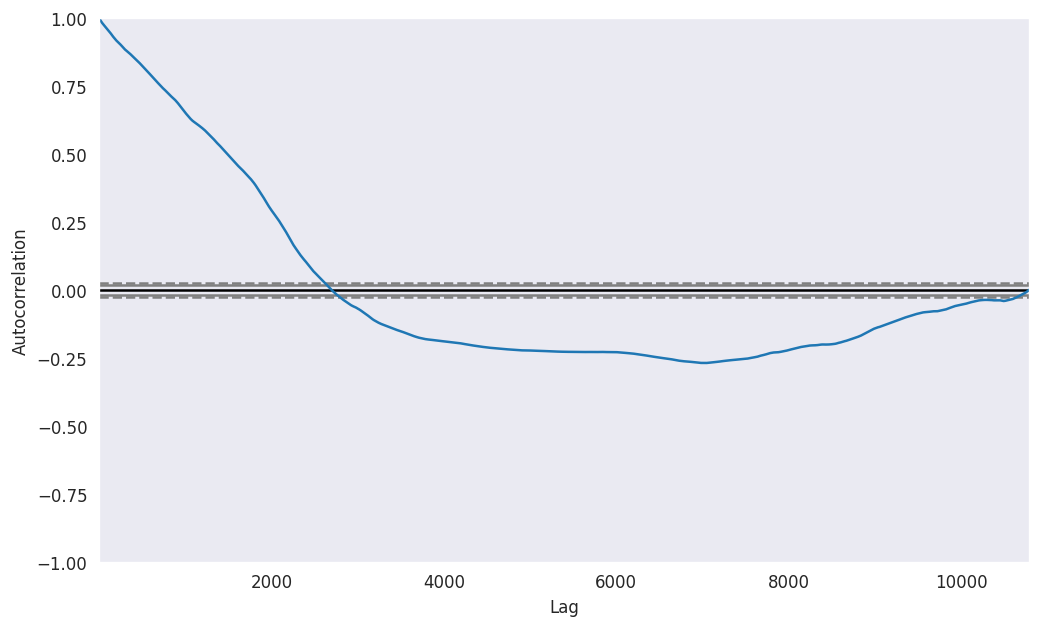

In [35]:
# Test for seasonality
from pandas.plotting import autocorrelation_plot

# Draw Plot
plt.rcParams.update({'figure.figsize':(10,6), 'figure.dpi':120})
autocorrelation_plot(gold_df['Value'].tolist())

Alternately, if we want a statistical test, the CHTest can determine if seasonal differencing is required to stationarize the series.

# 9. Finding Terms

## 9.1 How to find the order of the AR term (p)

* The next step is to identify if the model needs any AR terms. We will find out the required number of AR terms by inspecting the **Partial Autocorrelation (PACF) plot.**
* **Partial autocorrelation** can be imagined as the correlation between the series and its lag, after excluding the contributions from the intermediate lags. So, PACF sort of conveys the pure correlation between a lag and the series. This way, we will know if that lag is needed in the AR term or not.
* Partial autocorrelation of lag (k) of a series is the coefficient of that lag in the autoregression equation of Y.
                    
                                        **Yt=α0+α1Yt−1+α2Yt−2+α3Yt−3**
 
* That is, suppose, if Y_t is the current series and Y_t-1 is the lag 1 of Y, then the partial autocorrelation of lag 3 (Y_t-3) is the coefficient  **α3**  of Y_t-3 in the above equation.

* Now, we should find the number of AR terms. Any autocorrelation in a stationarized series can be rectified by adding enough AR terms. So, we initially take the order of AR term to be equal to as many lags that crosses the significance limit in the PACF plot.

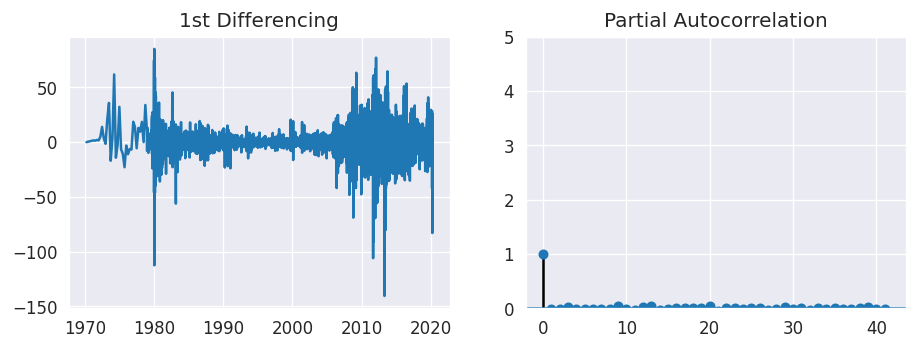

In [36]:
# PACF plot of 1st differenced series
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2)
axes[0].plot(gold_df.Value.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(gold_df.Value.diff().dropna(), ax=axes[1])

plt.show()

## 9.2 How to find the order of the MA Term (q)

* Just like how we looked at the PACF plot for the number of AR terms, we will look at the ACF plot for the number of MA terms. An MA term is technically, the error of the lagged forecast.
* The ACF tells how many MA terms are required to remove any autocorrelation in the stationarized series.
* Let’s see the autocorrelation plot of the differenced series.

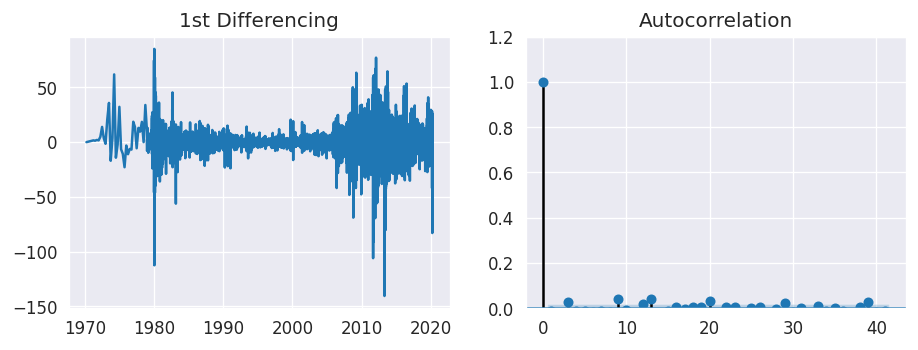

In [37]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2)
axes[0].plot(gold_df.Value.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,1.2))
plot_acf(gold_df.Value.diff().dropna(), ax=axes[1])

plt.show()

We can see that couple of lags are above/below the significance line. So, we will fix q as __. If there is any doubt, we will go with the simpler model that sufficiently explains the Y.

# 10. How to build the ARIMA Model

Now, we have determined the values of p, d and q. We have everything needed to fit the ARIMA model. We will use the ARIMA() implementation in the statsmodels package.

In [38]:



# 1,1,2 ARIMA Model
model = ARIMA(gold_df.Value, order=(1,1,0))
model_fit = model.fit()
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Value   No. Observations:                10786
Model:                 ARIMA(1, 1, 0)   Log Likelihood              -39042.310
Method:                       css-mle   S.D. of innovations              9.032
Date:                Thu, 04 Aug 2022   AIC                          78090.620
Time:                        13:49:29   BIC                          78112.478
Sample:                             1   HQIC                         78097.991
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1416      0.086      1.648      0.099      -0.027       0.310
ar.L1.D.Value    -0.0121      0.010     -1.255      0.209      -0.031       0.007
                                    Root

* The model summary provides lot of information. The table in the middle is the coefficients table where the values under ‘coef’ are the weights of the respective terms.

* The coefficient of the MA2 term is close to zero and the P-Value in ‘P>|z|’ column is highly insignificant. It should ideally be less than 0.05 for the respective X to be significant.

* So, we will rebuild the model.

In [39]:
#from statsmodels.tsa.arima_model import ARIMA

# 1,1,2 ARIMA Model
model = ARIMA(gold_df.Value, order=(2,1,0))
model_fit = model.fit()
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Value   No. Observations:                10786
Model:                 ARIMA(2, 1, 0)   Log Likelihood              -39039.985
Method:                       css-mle   S.D. of innovations              9.030
Date:                Thu, 04 Aug 2022   AIC                          78087.969
Time:                        13:49:34   BIC                          78117.113
Sample:                             1   HQIC                         78097.797
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1418      0.084      1.685      0.092      -0.023       0.307
ar.L1.D.Value    -0.0124      0.010     -1.283      0.199      -0.031       0.007
ar.L2.D.Value    -0.0208      0.010     

* The model AIC has slightly reduced, which is good. [Its still very high] The p-values of the AR1 and AR2 terms have improved and are highly significant (<< 0.05).

* Let’s plot the residuals to ensure there are no patterns (that is, look for constant mean and variance).

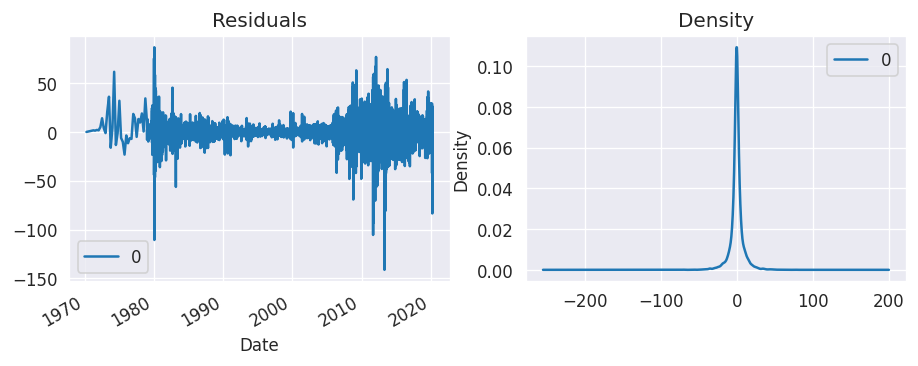

In [40]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

* The residual errors seem fine with near zero mean and uniform variance. Let’s plot the actuals against the fitted values using plot_predict().

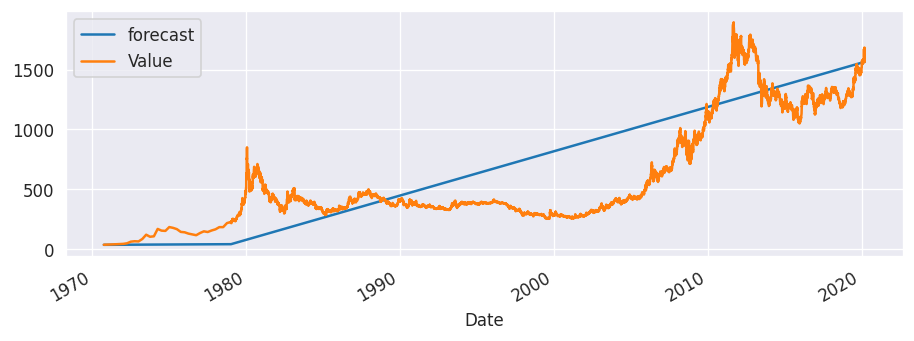

In [41]:
# Actual vs Fitted
model_fit.plot_predict(dynamic=True)
plt.show()

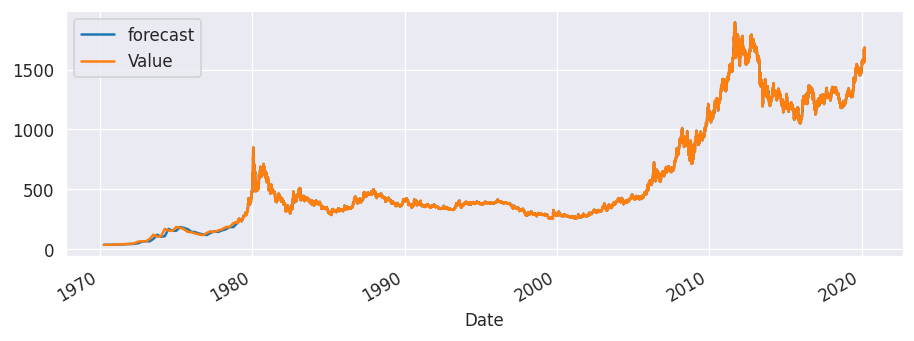

In [42]:
# Actual vs Fitted
model_fit.plot_predict(dynamic=False)
plt.show()

* When we set dynamic=False the in-sample lagged values are used for prediction. That is, the model gets trained up until the previous value to make the next prediction. This can make the fitted forecast and actuals look artificially good.

* So, we seem to have a decent ARIMA model. But, we can’t say that this is the best ARIMA model because we haven’t actually forecasted into the future and compared the forecast with the actual performance.

* So, the real validation we need now is the Out-of-Time cross-validation, discussed next.

# 11. Find the Optimal ARIMA model using Out-of-Time Cross Validation

* In Out-of-Time cross-validation, we move backwards in time and forecast into the future to as many steps we took back. Then we compare the forecast against the actuals.

* To do so, we will create the training and testing dataset by splitting the time series into 2 contiguous parts in a reasonable proportion based on time frequency of series.

## 11.1 Train-Test Split

In [43]:
from datetime import datetime,timedelta
train_dataset_end=datetime(2010,1,1)
test_dataset_end=datetime(2020,3,13)

In [44]:
X_train=gold_df[:train_dataset_end]
X_test=gold_df[train_dataset_end+timedelta(days=1):test_dataset_end]

In [45]:
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)

X_train shape:  (8127, 1)
X_test shape:  (2660, 1)


In [46]:
##prediction
pred_start_date=X_test.index[0]
pred_end_date=X_test.index[-1]

## 11.2 Model
* Now, we will build the ARIMA model on training dataset, forecast and plot it.

                             ARIMA Model Results                              
Dep. Variable:                D.Value   No. Observations:                 8126
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -27146.913
Method:                       css-mle   S.D. of innovations              6.833
Date:                Thu, 04 Aug 2022   AIC                          54301.826
Time:                        13:50:17   BIC                          54329.837
Sample:                             1   HQIC                         54311.406
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1295      0.074      1.757      0.079      -0.015       0.274
ar.L1.D.Value     0.0466      0.169      0.276      0.782      -0.284       0.377
ma.L1.D.Value    -0.0732      0.168     

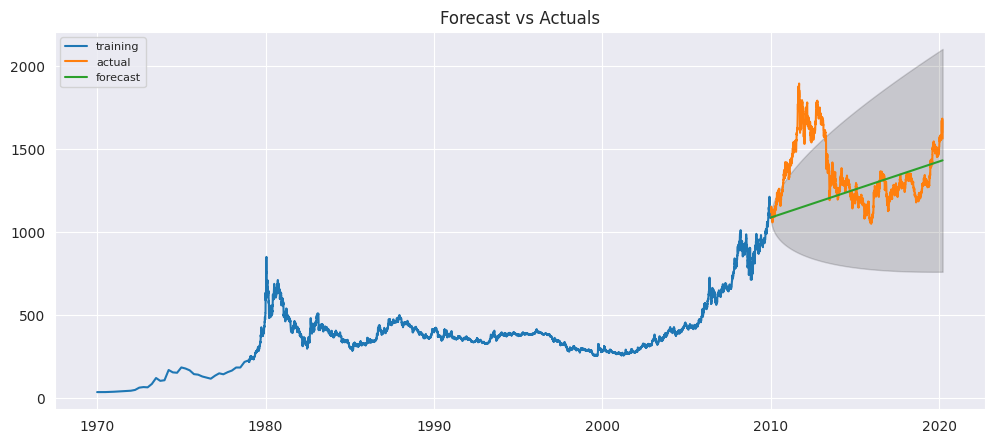

In [47]:
# Build Model
# model = ARIMA(train, order=(3,2,1))  
model = ARIMA(X_train, order=(1, 1, 1))  
fitted = model.fit(disp=-1)
print(fitted.summary())   

# Forecast
fc, se, conf = fitted.forecast(2660, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=X_test.index)
lower_series = pd.Series(conf[:, 0], index=X_test.index)
upper_series = pd.Series(conf[:, 1], index=X_test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(X_train, label='training')
plt.plot(X_test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

* From the above chart, the ARIMA(1,1,1) model seems to predict a correct forecast. The actual observed values lie within the 95% confidence band.

* But, we can see that the predicted forecasts is consistently below the actuals. That means, by adding a small constant to our forecast, the accuracy will certainly improve.

* So, in this case, we should increase the order of differencing to two (d=2) and iteratively increase p and q up to 5 to see which model gives least AIC and also look for a chart that gives closer actuals and forecasts.

* While doing this, I keep an eye on the P values of the AR and MA terms in the model summary. They should be as close to zero, ideally, less than 0.05.

* The difference can also be explained by Global Events, such as the sharp price rise towards the end of 2012 and the consequential rebalancing.

                             ARIMA Model Results                              
Dep. Variable:               D2.Value   No. Observations:                 8125
Model:                 ARIMA(3, 2, 1)   Log Likelihood              -27128.266
Method:                       css-mle   S.D. of innovations              6.818
Date:                Thu, 04 Aug 2022   AIC                          54268.531
Time:                        13:50:30   BIC                          54310.547
Sample:                             2   HQIC                         54282.902
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const           1.449e-05   7.44e-05      0.195      0.846      -0.000       0.000
ar.L1.D2.Value    -0.0262      0.011     -2.362      0.018      -0.048      -0.004
ar.L2.D2.Value    -0.0107      0.011

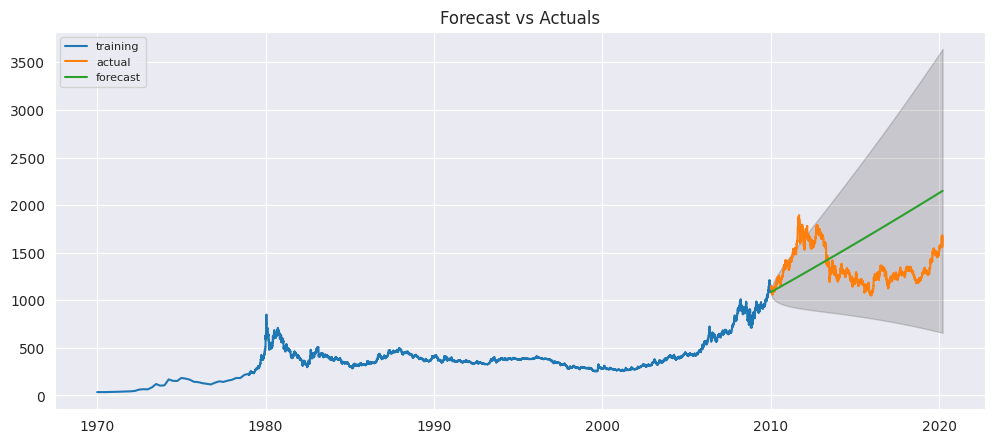

In [48]:
# Build Model
model = ARIMA(X_train, order=(3,2,1))  
#model = ARIMA(X_train, order=(1, 1, 1))  
fitted = model.fit(disp=-1) 
print(fitted.summary()) 

# Forecast
fc, se, conf = fitted.forecast(2660, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=X_test.index)
lower_series = pd.Series(conf[:, 0], index=X_test.index)
upper_series = pd.Series(conf[:, 1], index=X_test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(X_train, label='training')
plt.plot(X_test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

* The AIC has reduced marginally, which is always a good sign, but its still very high.
* This however, is a much better fit than the previous model.

                             ARIMA Model Results                              
Dep. Variable:                D.Value   No. Observations:                 8126
Model:                 ARIMA(2, 1, 2)   Log Likelihood              -27111.719
Method:                       css-mle   S.D. of innovations              6.804
Date:                Thu, 04 Aug 2022   AIC                          54235.439
Time:                        13:50:40   BIC                          54277.456
Sample:                             1   HQIC                         54249.809
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1295      0.075      1.719      0.086      -0.018       0.277
ar.L1.D.Value     0.5937      0.030     19.507      0.000       0.534       0.653
ar.L2.D.Value    -0.8307      0.039    -

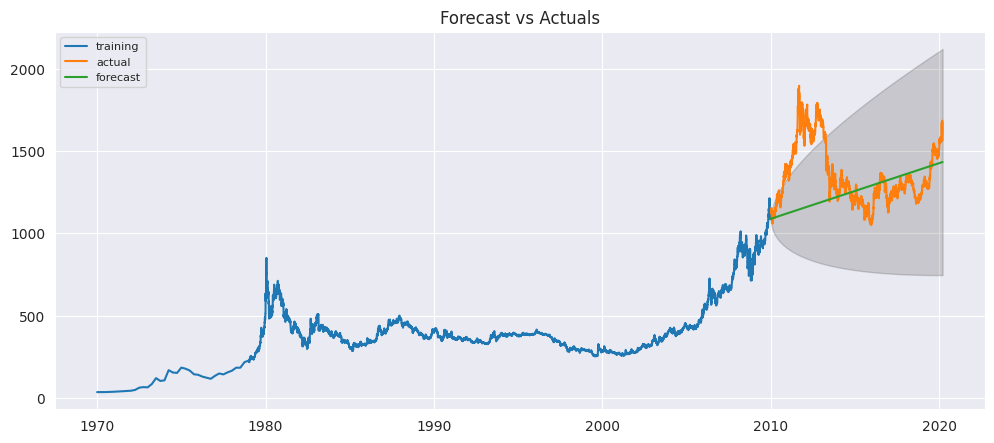

In [49]:
# Build Model
model = ARIMA(X_train, order=(2,1,2))  
#model = ARIMA(X_train, order=(1, 1, 1))  
fitted = model.fit(disp=-1) 
print(fitted.summary()) 

# Forecast
fc, se, conf = fitted.forecast(2660, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=X_test.index)
lower_series = pd.Series(conf[:, 0], index=X_test.index)
upper_series = pd.Series(conf[:, 1], index=X_test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(X_train, label='training')
plt.plot(X_test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

# 12. Accuracy Metrics for Time Series Forecasting

The commonly used accuracy metrics to judge forecasts are:

1. Mean Absolute Percentage Error (MAPE)
2. Mean Error (ME)
3. Mean Absolute Error (MAE)
4. Mean Percentage Error (MPE)
5. Root Mean Squared Error (RMSE)
6. Lag 1 Autocorrelation of Error (ACF1)
7. Correlation between the Actual and the Forecast (corr)
8. Min-Max Error (minmax)

Typically, we will use three accuracy metrices:-

1. MAPE
2. Correlation and
3. Min-Max Error

can be used. The above three are percentage errors that vary between 0 and 1. That way, we can judge how good is the forecast irrespective of the scale of the series.

In [50]:
print("X_test shape:" ,X_test.shape)
print("fc shape:",fc.shape)

X_test shape: (2660, 1)
fc shape: (2660,)


In [51]:
fc = fc.reshape((2660, 1))

In [52]:
# Accuracy metrics
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    acf1 = acf(fc-X_test)[1]                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'acf1':acf1, 
            'corr':corr, 'minmax':minmax})

forecast_accuracy(fc, X_test.values)

{'acf1': 0.9981595705697388,
 'corr': nan,
 'mae': 176.2588813492164,
 'mape': 0.12087226399134243,
 'me': -91.33326189428908,
 'minmax': 0.11745780206400569,
 'mpe': -0.05015463027404719,
 'rmse': 244.59317152537244}

Around 31.77% MAPE implies the model is about 69.78% accurate in predicting the next 15 observations. Now we know how to build an ARIMA model manually.

But, we should also know how to automate the best model selection process. So, we will discuss it next.

# 13. Auto ARIMA Forecasting in Python

* In Python, the pmdarima package provides auto_arima() function which can be used to automate the process of ARIMA Forecasting in Python.

* `auto_arima()` uses a stepwise approach to search multiple combinations of p, d, q parameters and chooses the best model that has the least AIC.

* We need to install the pmdarima package first.

In [53]:
!pip install pmdarima --quiet

     |████████████████████████████████| 1.4 MB 5.1 MB/s 
     |████████████████████████████████| 9.8 MB 51.9 MB/s 


In [54]:
from statsmodels.tsa.arima_model import ARIMA

import pmdarima as pm

model = pm.auto_arima(gold_df.Value, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=78088.281, Time=7.46 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=78090.196, Time=0.67 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=78090.620, Time=1.28 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=78090.554, Time=1.62 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=78090.847, Time=0.35 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=78081.126, Time=14.49 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=78087.969, Time=2.39 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=78082.775, Time=15.94 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=78048.396, Time=17.79 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=78081.191, Time=7.89 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=78049.950, Time=22.55 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=78084.745, Time=11.57 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=78082.704, Time=10.10 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=78086.029, Time=26.90 sec
 ARIMA(2,1,2

**According to the AutoARIMA, the best model has the values 2 for p, 1 for d and 2 for q.**

# 14. How to interpret the residual plots in ARIMA model

Let’s review the residual plots using stepwise_fit.

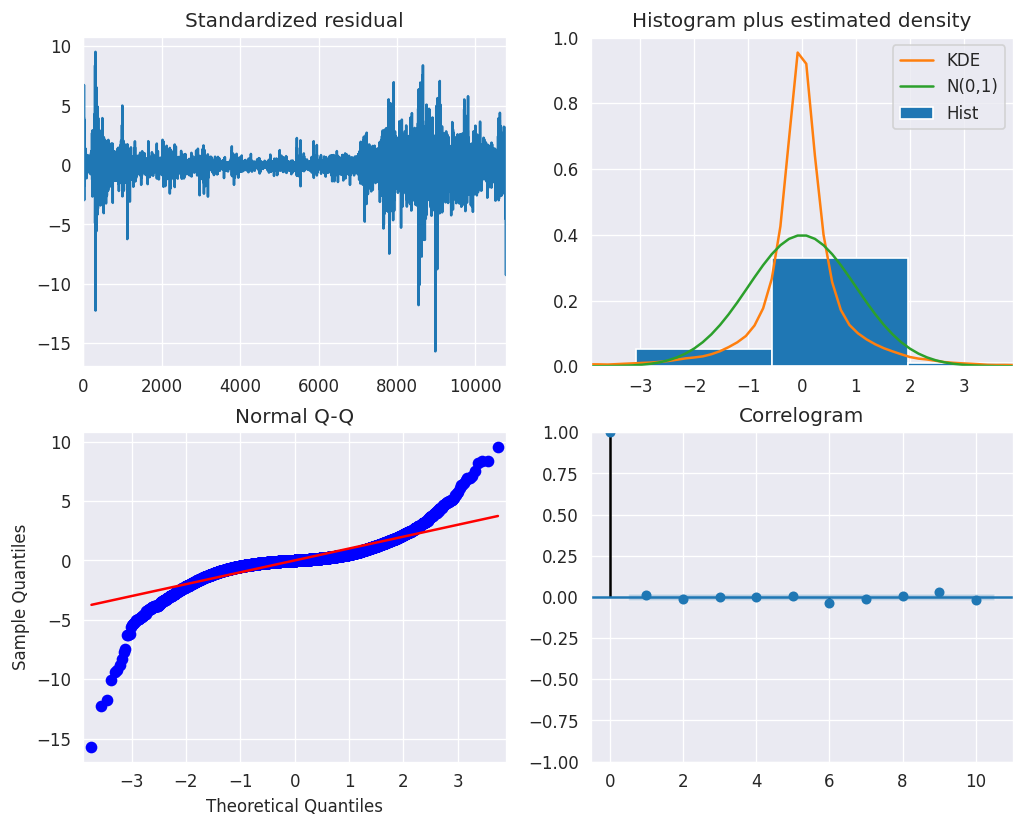

In [57]:
model.plot_diagnostics(figsize=(10,8))
plt.show()

**Interpretation of plots in plot diagnostics**

1. **Standardized residual:** The residual errors seem to fluctuate around a mean of zero and have a uniform variance.

2. **Histogram:** The density plot suggest normal distribution with mean slighlty shifted towards right.

3. **Theoretical Quantiles:** Mostly the dots fall perfectly in line with the red line. Any significant deviations would imply the distribution is skewed.

4. **Correlogram:** The Correlogram, (or ACF plot) shows the residual errors are not autocorrelated. The ACF plot would imply that there is some pattern in the residual errors which are not explained in the model. So we will need to look for more X’s (predictors) to the model.

# 15. Forecasting


Overall, the model seems to be a good fit. So, let's use it to forecast.

In [56]:
# Forecast
n_periods = 24
fc, confint = model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.arange(len(gold_df.Value), len(gold_df.Value) + n_periods)

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(gold_df.Value)
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("Final Forecast of Usage")
plt.show()

ValueError: ignored

<Figure size 1080x360 with 1 Axes>

# 16. SARIMA Model in Python

* The plain ARIMA model has a problem. It does not support seasonality.
* If the time series has defined seasonality, then we should go for Seasonal ARIMA model (in short SARIMA) which uses seasonal differencing.
* Seasonal differencing is similar to regular differencing, but, instead of subtracting consecutive terms, we subtract the value from previous season.
* So, the model will be represented as SARIMA(p,d,q)x(P,D,Q), where, P, D and Q are SAR, order of seasonal differencing and SMA terms respectively and 'x' is the frequency of the time series. If the model has well defined seasonal patterns, then enforce D=1 for a given frequency ‘x’.
* We should set the model parameters such that D never exceeds one. And the total differencing ‘d + D’ never exceeds 2. We should try to keep only either SAR or SMA terms if the model has seasonal components.
* Now, we will build a SARIMA model on the time series dataset.

In [58]:
data=pd.read_csv('learn-time-series-forecasting-from-gold-price/gold_price_data.csv', parse_dates=['Date'], index_col='Date')

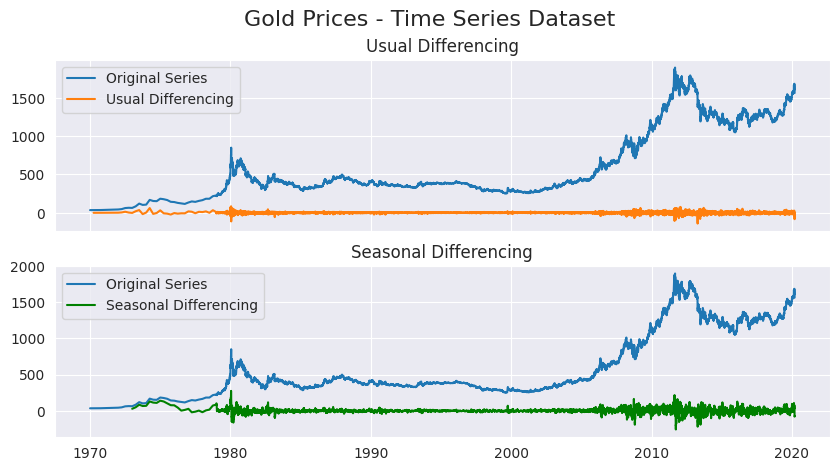

In [59]:
# Plot
fig, axes = plt.subplots(2, 1, figsize=(10,5), dpi=100, sharex=True)

# Usual Differencing
axes[0].plot(data[:], label='Original Series')
axes[0].plot(data[:].diff(1), label='Usual Differencing')
axes[0].set_title('Usual Differencing')
axes[0].legend(loc='upper left', fontsize=10)


# Seasonal Differencing
axes[1].plot(data[:], label='Original Series')
axes[1].plot(data[:].diff(12), label='Seasonal Differencing', color='green')
axes[1].set_title('Seasonal Differencing')
plt.legend(loc='upper left', fontsize=10)
plt.suptitle('Gold Prices - Time Series Dataset', fontsize=16)
plt.show()

* We can see that, the seasonal spikes are intact after applying usual differencing (lag 1). Whereas, it is rectified after seasonal differencing.

* Now, let’s build the SARIMA model using pmdarima‘s auto_arima(). To do so, we need to set seasonal=True, set the frequency m=12 for month wise series and enforce D=1.

In [ ]:
import pmdarima as pm

# Seasonal - fit stepwise auto-ARIMA
smodel = pm.auto_arima(data, start_p=1, start_q=1,
                         test='adf',          # use adftest to find optimal 'd'
                         max_p=3, max_q=3,    # maximum p and q
                         m=12,                # frequency of series
                         seasonal=True,       # Seasonality
                         start_P=0, 
                         d=None,              # let model determine 'd'
                         D=1, 
                         trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodel.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=79.89 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=103960.600, Time=0.85 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=82133.777, Time=18.21 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=94414.231, Time=23.62 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=103995.703, Time=0.47 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=84722.565, Time=1.73 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=80952.557, Time=57.65 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=150.80 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=70.41 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=103939.785, Time=25.82 sec
 ARIMA(2,0,0)(2,1,0)[12] intercept   : AIC=80953.448, Time=74.95 sec


### DEAR PERSPECTIVE EMPLOYER, IF YOU'VE REACHED THIS FAR, YOU CAN SEE THAT MODEL CRACHES DUE TO A SHORTAGE OF RAM. SO, THE MODEL WORKS, WE JUST NEED A BETTER RIG TO COMPUTE,

## 16.1 Forecasting

In [ ]:
# Forecast
n_periods = 24
fitted, confint = smodel.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = pd.date_range(data.index[-1], periods = n_periods, freq='MS')

# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(data)
plt.plot(fitted_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("SARIMA - Final Forecast of Drug Sales - Time Series Dataset")
plt.show()

In [60]:
jovian.commit()

[jovian] Detected Colab notebook...


[jovian] Error: jovian.commit doesn't work on Colab unless the notebook was created and executed from Jovian.
Make sure to run the first code cell at the top after executing from Jovian.
Alternatively, you can download this notebook and upload it manually to Jovian.
Learn more: https://jovian.ai/docs/user-guide/run.html#run-on-colab
